In [4]:
from helpers.training import *
from helpers.architectures import *
from helpers.helpers import *
import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from torch.optim import Adam
import torch.optim as optim

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
training_img, _ = load_images()
mean, std = to_float_image(training_img).mean(dim=(0,2,3)), to_float_image(training_img).std(dim=(0,2,3))


to_float_and_normalize = transforms.Compose([ToFloatImage(), transforms.Normalize(mean =mean, std = std)])
to_float = transforms.Compose([ToFloatImage()])


train_loader = DataLoader(
    Noise2NoiseDataset('./dataset/train_data.pkl', 
                       transform=to_float_and_normalize, 
                       target_transform=to_float),
    batch_size = 128,
    num_workers = 2,
    shuffle = True,
    pin_memory = torch.cuda.is_available()
)

validation = DataLoader(
    Noise2NoiseDataset('./dataset/val_data.pkl', 
                       transform=to_float_and_normalize, 
                       target_transform=to_float,  
                       nb_samples=500),
    batch_size = 128,
    num_workers = 2,
    shuffle = True,
    pin_memory = torch.cuda.is_available()
)

In [6]:
model = Unet().to(device)
optim = Adam(model.parameters(), lr=3e-4)

#to remove
#scheduler = torch.optim.lr_scheduler.OneCycleLR(optim, max_lr=2e-3, total_steps=1000)

metric = psnr_metric()
criterion = nn.MSELoss()


train_loss, test_loss, unet_psnr = train(model, 
                                           train_loader, 
                                           validation, 
                                           optim, 
                                           criterion, 
                                           metric, 
                                           gradient_steps=1000, 
                                           samples_steps=100,
                                           lr_scheduler=None)

100%|██████████| 1000/1000 [01:45<00:00,  9.45it/s]


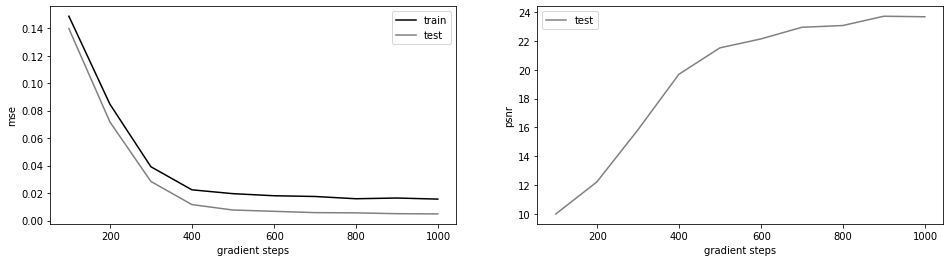

In [7]:
plot_losses(train_loss, test_loss, unet_psnr)

In [8]:
eval_model(model, validation, psnr_metric())

23.818542957305908

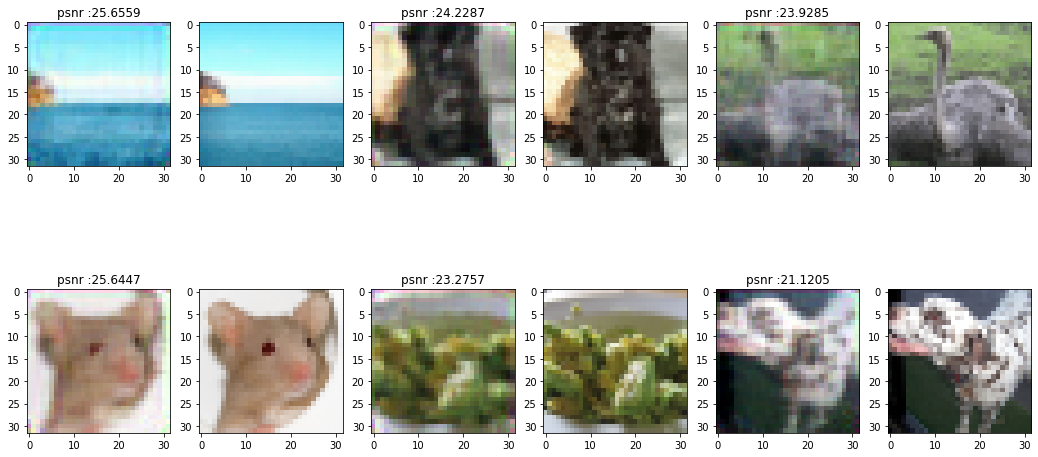

In [9]:
show_results(model, validation, nb_cols=3, nb_rows=2)

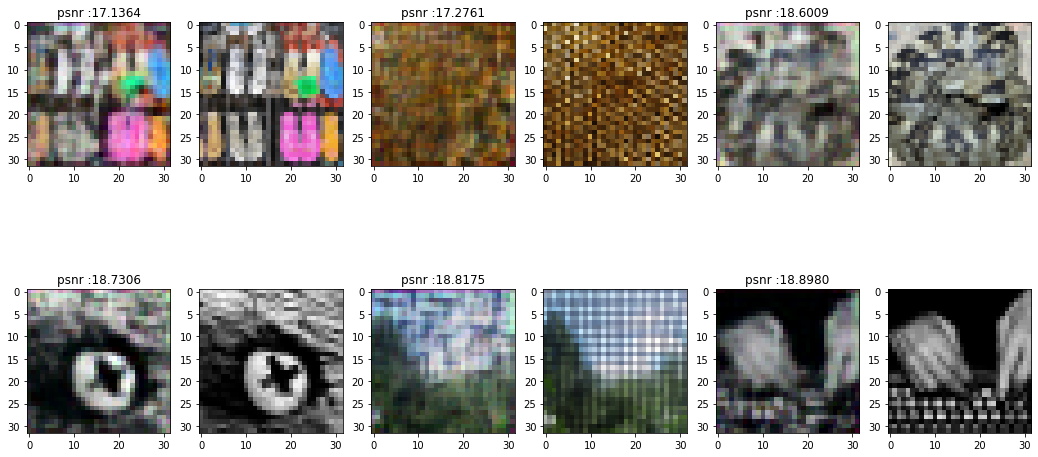

In [10]:
show_worst(model, validation, nb_cols=3, nb_rows=2)

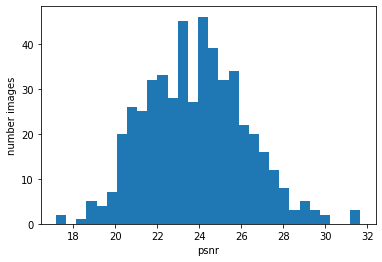

In [11]:
plot_psnr_distribution(model, validation)

In [12]:
model = ResNet().to(device)
optim = Adam(model.parameters(), lr=3e-4)

#to remove
##scheduler = torch.optim.lr_scheduler.OneCycleLR(optim, max_lr=2e-3, total_steps=1000)

metric = psnr_metric()
criterion = nn.MSELoss()


train_loss, test_loss, resnet_psnr = train(model, 
                                           train_loader, 
                                           validation, 
                                           optim, 
                                           criterion, 
                                           metric, 
                                           gradient_steps=1000, 
                                           samples_steps=100,
                                           lr_scheduler=None)

100%|██████████| 1000/1000 [04:41<00:00,  3.55it/s]


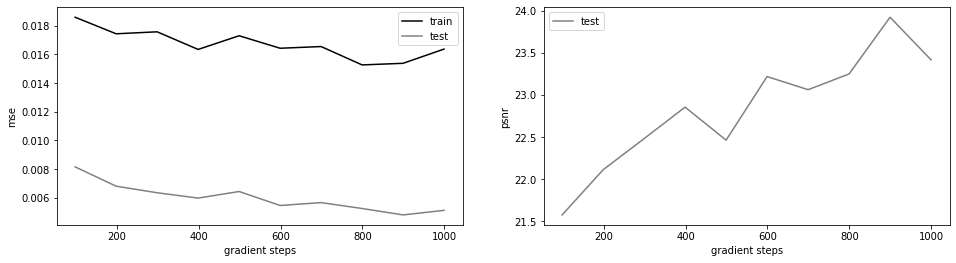

In [13]:
plot_losses(train_loss, test_loss, resnet_psnr)

In [14]:
eval_model(model, validation, psnr_metric())

23.576301097869873

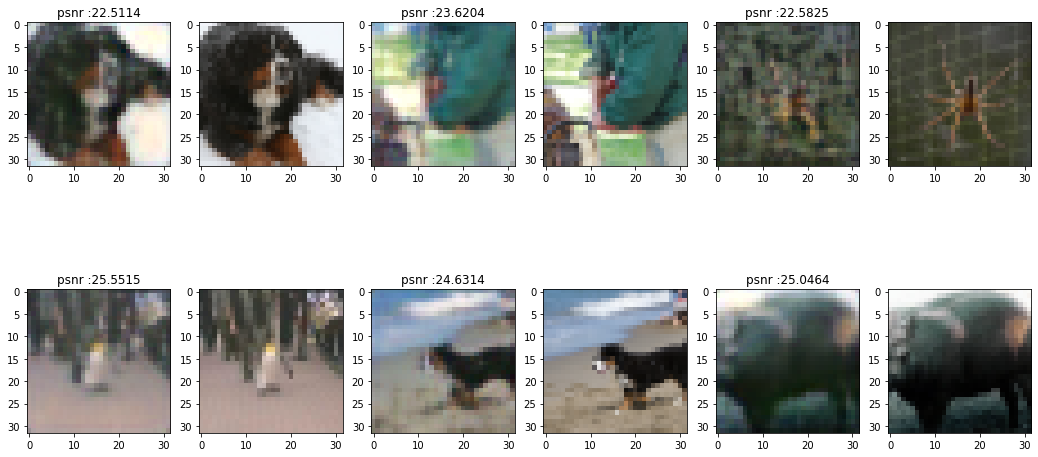

In [15]:
show_results(model, validation, nb_cols=3, nb_rows=2)

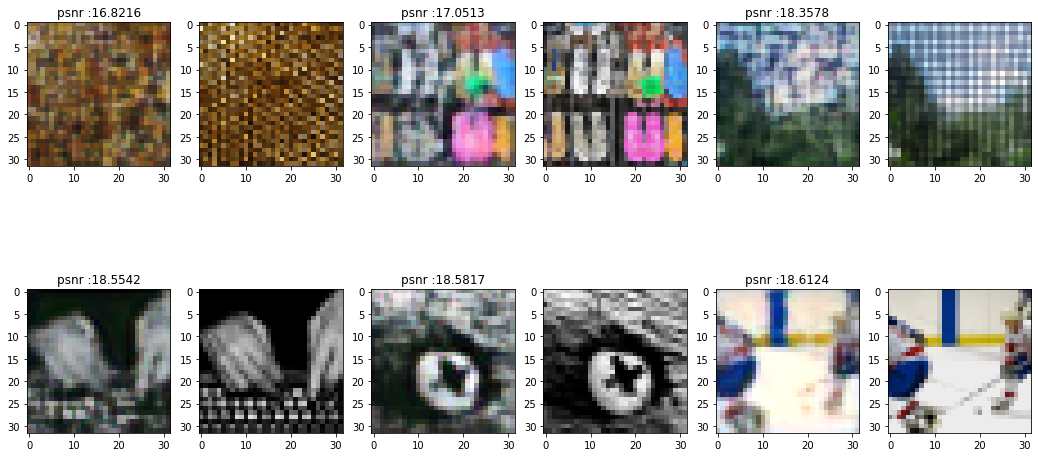

In [16]:
show_worst(model, validation, nb_cols=3, nb_rows=2)

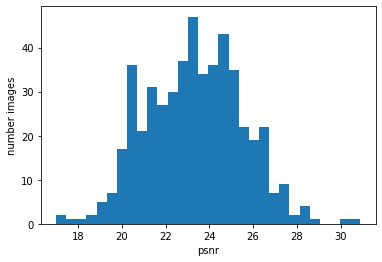

In [17]:
plot_psnr_distribution(model, validation)

In [18]:
model = ConvNet().to(device)
optim = Adam(model.parameters(), lr=3e-4) ##or 3e-4

#to remove
#scheduler = torch.optim.lr_scheduler.OneCycleLR(optim, max_lr=2e-2, total_steps=250)

metric = psnr_metric()
criterion = nn.MSELoss()


train_loss, test_loss, convnet_psnr = train(model, 
                                           train_loader, 
                                           validation, 
                                           optim, 
                                           criterion, 
                                           metric, 
                                           gradient_steps=1000, 
                                           samples_steps=100,
                                           lr_scheduler=None)

100%|██████████| 1000/1000 [02:51<00:00,  5.83it/s]


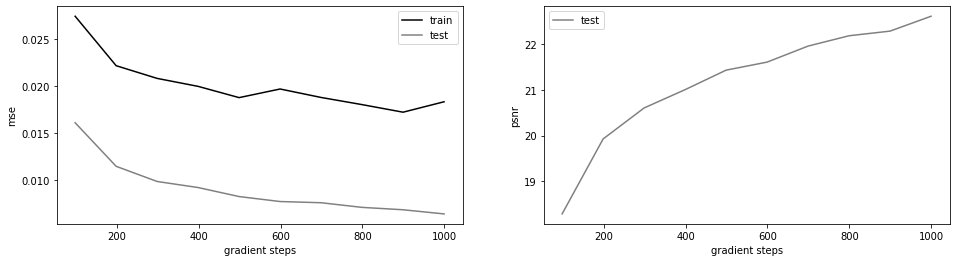

In [19]:
plot_losses(train_loss, test_loss, convnet_psnr)

In [20]:
eval_model(model, validation, psnr_metric())

22.55167579650879

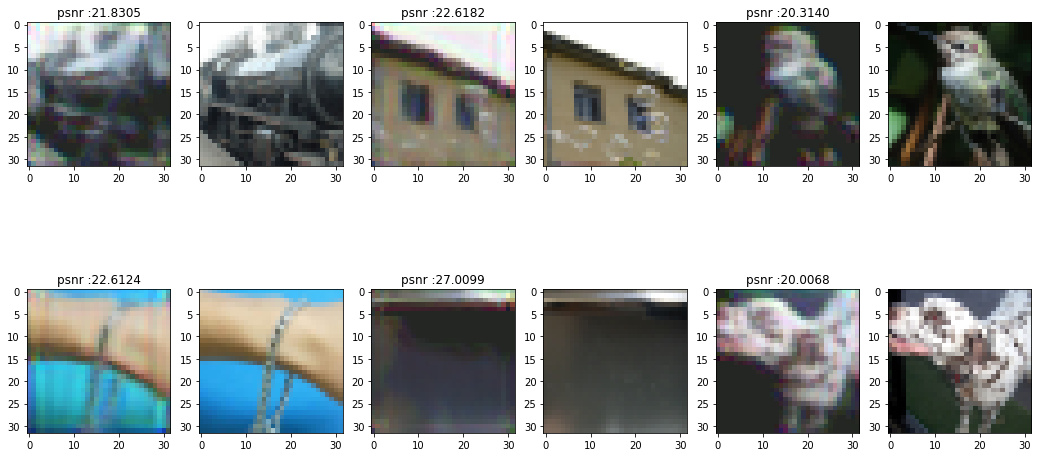

In [21]:
show_results(model, validation, nb_cols=3, nb_rows=2)

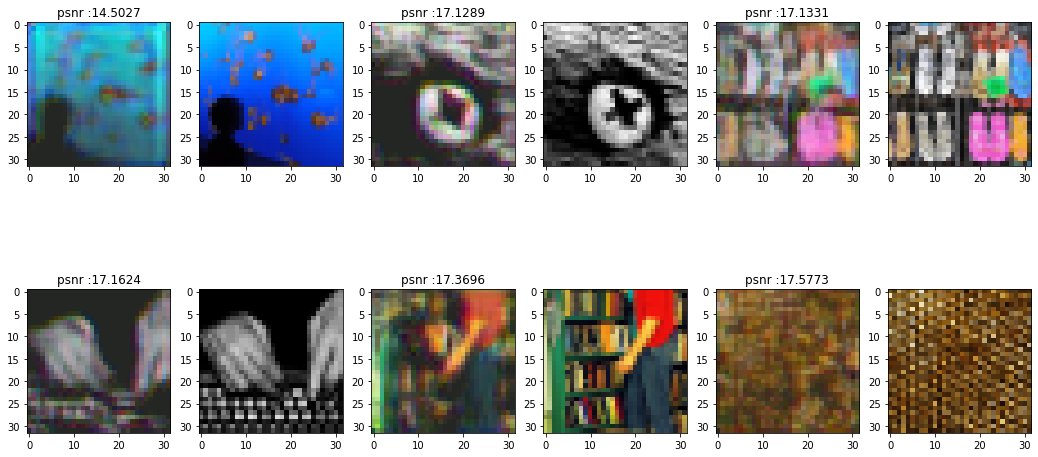

In [22]:
show_worst(model, validation, nb_cols=3, nb_rows=2)

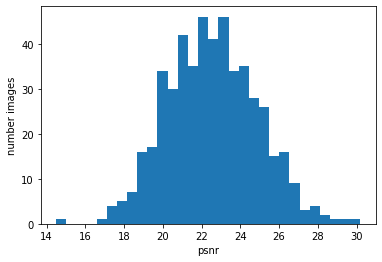

In [23]:
plot_psnr_distribution(model, validation)

In [24]:
model = UnetWithSigmoid().to(device)
optim = Adam(model.parameters(), lr=3e-4)

#to remove
##scheduler = torch.optim.lr_scheduler.OneCycleLR(optim, max_lr=2e-3, total_steps=1000)

metric = psnr_metric()
criterion = nn.MSELoss()


train_loss, test_loss, unetsigmoid_psnr = train(model, 
                                           train_loader, 
                                           validation, 
                                           optim, 
                                           criterion, 
                                           metric, 
                                           gradient_steps=1000, 
                                           samples_steps=100,
                                           lr_scheduler=None)

100%|██████████| 1000/1000 [01:52<00:00,  8.92it/s]


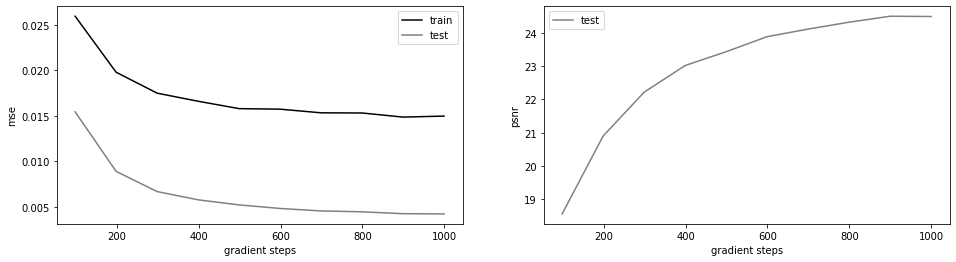

In [25]:
plot_losses(train_loss, test_loss, unetsigmoid_psnr)

In [26]:
eval_model(model, validation, psnr_metric())

24.517147064208984

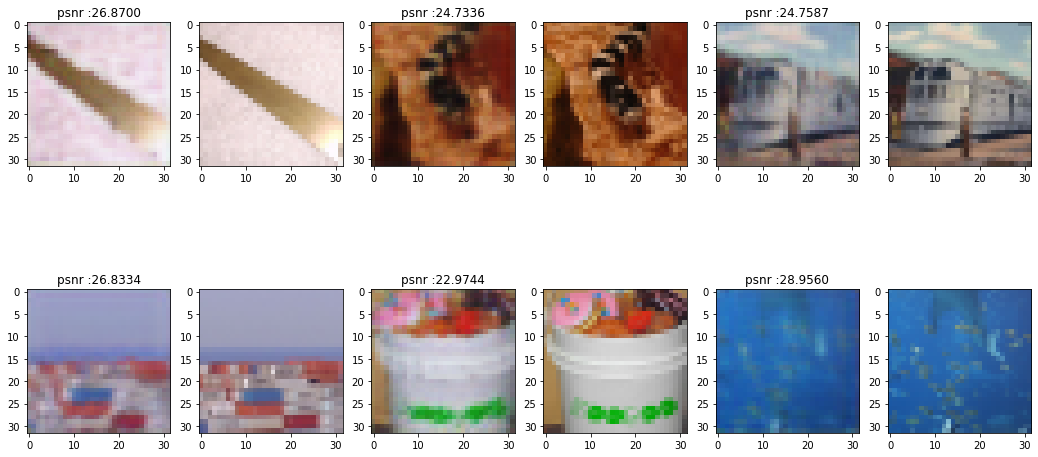

In [27]:
show_results(model, validation, nb_cols=3, nb_rows=2)

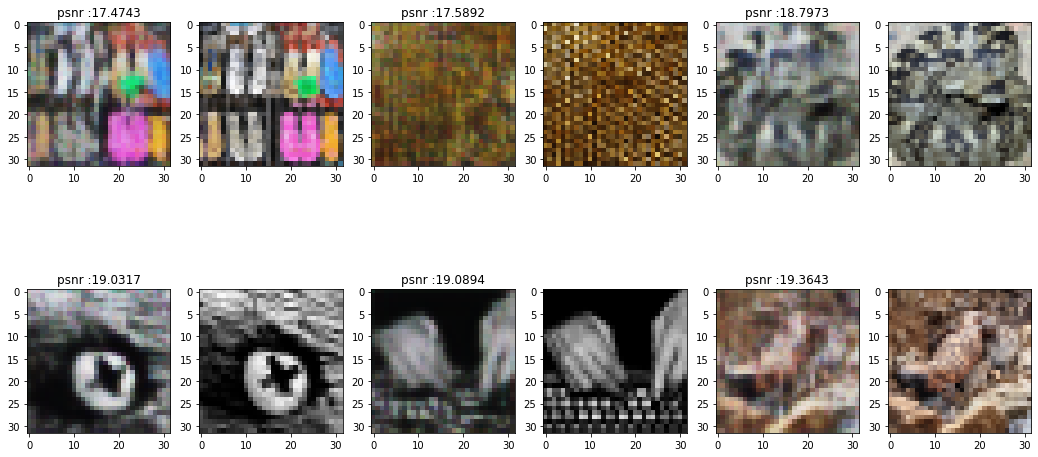

In [28]:
show_worst(model, validation, nb_cols=3, nb_rows=2)

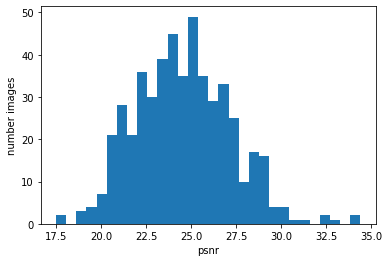

In [29]:
plot_psnr_distribution(model, validation)

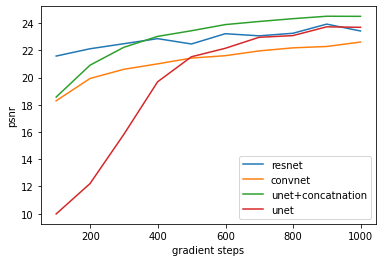

In [31]:
import matplotlib.pyplot as plt

_, axis = plt.subplots()
plot_psnr([resnet_psnr, convnet_psnr, unetsigmoid_psnr, unet_psnr], ['resnet', 'convnet', 'unet+concatnation', 'unet'], axis)